<a href="https://colab.research.google.com/github/tony1966/colab/blob/main/reinforcement_learning_ch3_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%matplotlib inline

In [23]:
from tensorflow.keras.datasets import mnist     
from tensorflow.keras.models import Sequential   
from tensorflow.keras.layers import Dense, Activation, Dropout            
from tensorflow.keras.optimizers import SGD                
from tensorflow.keras.utils import plot_model      
from tensorflow.keras.utils import to_categorical  
import matplotlib.pyplot as plt                                 
import numpy as np

In [24]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [25]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [27]:
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


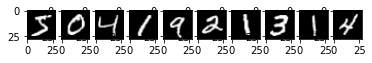

In [28]:
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_images[i], 'gray')

In [29]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [30]:
train_images=train_images.reshape((train_images.shape[0], 784))
test_images=test_images.reshape((test_images.shape[0], 784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [31]:
# 檢視第 0 張圖片之原標籤
print(train_labels[0])
print(test_labels[0])
# 將全部標籤轉成 one-hot 編碼
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
# 檢視轉換後的第 0 張圖片之新標籤
print(train_labels[0])
print(test_labels[0])
# 檢視轉換後的標籤形狀
print(train_labels.shape)
print(test_labels.shape)

5
7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10)
(10000, 10)


In [32]:
# 建構神經網路模型
model=Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,))) # 輸入層+隱藏層1
model.add(Dense(128, activation='sigmoid')) # 隱藏層2
model.add(Dropout(rate=0.5)) # Dropout
model.add(Dense(10, activation='softmax')) # 輸出層

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), 
              metrics=['acc'])

In [35]:
history=model.fit(train_images, train_labels, batch_size=500,
    epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
96/96 [==============================] - 2s 20ms/step - loss: 1.7063 - acc: 0.4466 - val_loss: 0.9893 - val_acc: 0.8326
Epoch 2/5
96/96 [==============================] - 2s 17ms/step - loss: 0.9367 - acc: 0.7388 - val_loss: 0.5935 - val_acc: 0.8818
Epoch 3/5
96/96 [==============================] - 2s 17ms/step - loss: 0.6745 - acc: 0.8157 - val_loss: 0.4460 - val_acc: 0.8964
Epoch 4/5
96/96 [==============================] - 2s 17ms/step - loss: 0.5536 - acc: 0.8495 - val_loss: 0.3705 - val_acc: 0.9076
Epoch 5/5
96/96 [==============================] - 2s 17ms/step - loss: 0.4790 - acc: 0.8672 - val_loss: 0.3295 - val_acc: 0.9142


In [36]:
print(history.history)

{'loss': [1.7062885761260986, 0.9367091655731201, 0.6744827628135681, 0.5535663366317749, 0.47903767228126526], 'acc': [0.4466041624546051, 0.7388125061988831, 0.8157291412353516, 0.8494583368301392, 0.867229163646698], 'val_loss': [0.9893402457237244, 0.5934872031211853, 0.44598323106765747, 0.3705187141895294, 0.3295259475708008], 'val_acc': [0.8325833082199097, 0.8818333148956299, 0.8964166641235352, 0.9075833559036255, 0.9141666889190674]}


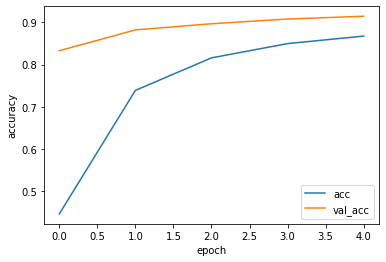

In [37]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [38]:
# 用測試集評估
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 [==============================] - 1s 3ms/step - loss: 0.3349 - acc: 0.9138
loss: 0.335
acc: 0.914


In [40]:
test_predictions=model.predict(test_images[0:1])
print([round(i,4) for i in test_predictions[0].tolist()])
# 顯示預測結果的標籤
test_predictions=np.argmax(test_predictions, axis=1)
print(test_predictions[0])

[0.0008, 0.0005, 0.0014, 0.0038, 0.0002, 0.0006, 0.0, 0.9827, 0.0003, 0.0097]
7


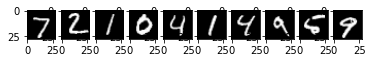

In [41]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

In [42]:
test_predictions=model.predict(test_images[0:10])
test_predictions=np.argmax(test_predictions, axis=1)
print(test_predictions)

[7 2 1 0 4 1 4 9 6 9]
